In [13]:
# PYHRV IMPORTS
import biosppy
import pyhrv
import pyhrv.time_domain as td

# MATH
import math

# SKLEARN
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# STATS
import pandas as pd
import matplotlib.pyplot as plt

# CONSTANTS
seed = 1234

# Stress Model II

Hopefully a more organized version of the models.

## 1) Set Up Data

In [3]:
# No ECG Data
data = pd.read_csv("C:\\Users\\citla\\SeniorDesign\\Datasets\\external_data\\MIT_driver_stress\\extracted_stress_data_no_ecg.csv")
data = data.to_numpy()

# No ECG Normalized Data
norm_data = pd.read_csv("C:\\Users\\citla\\SeniorDesign\\Datasets\\external_data\\MIT_driver_stress\\extracted_stress_data_no_ecg_norm.csv")
norm_data = norm_data.to_numpy()


# --- Data that includes GSR ---
# Split into X and Y
Xg = data[:,:3]     # NTS: use data[:,:3] if including GSR, else use data[:,:2]
yg = data[:,3]

# Split into Training and Testing sets (using 80/20 split)
Xg_tr, Xg_val, yg_tr, yg_val = train_test_split(Xg, yg, test_size=0.2, random_state=seed, shuffle=True)


# --- Normalized Data that includes GSR ---
# Split into X and Y
Xg_norm = norm_data[:,:3]     # NTS: use data[:,:3] if including GSR, else use data[:,:2]
yg_norm = norm_data[:,3]

# Split into Training and Testing sets (using 80/20 split)
Xg_tr_norm, Xg_val_norm, yg_tr_norm, yg_val_norm = train_test_split(Xg_norm, yg_norm, test_size=0.2, random_state=seed, shuffle=True)


# --- Data that excludes GSR ---
# Split into X and Y
X = data[:,:2]     # NTS: use data[:,:3] if including GSR, else use data[:,:2]
y = data[:,3]

# Split into Training and Testing sets (using 80/20 split)
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)


# --- Normalized Data that excludes GSR ---
# Split into X and Y
X_norm = norm_data[:,:2]     # NTS: use data[:,:3] if including GSR, else use data[:,:2]
y_norm = norm_data[:,3]

# Split into Training and Testing sets (using 80/20 split)
X_tr_norm, X_val_norm, y_tr_norm, y_val_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state=seed, shuffle=True)

## 2) Logistic Regression

### 2.1) Data that includes GSR

In [4]:
# Initialize the model
lr_1 = LogisticRegression(C=1, solver='liblinear')

# Fit the model to the training set
lr_1.fit(Xg_tr, yg_tr)

# Compute the training and test errors
yg_tr_pred = lr_1.predict(Xg_tr)
train_accuracy = accuracy_score(yg_tr, yg_tr_pred)
train_error = 1 - train_accuracy


yg_val_pred = lr_1.predict(Xg_val)
val_accuracy = accuracy_score(yg_val, yg_val_pred)
val_error = 1 - val_accuracy


print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.2310961790183491
Validation Error:  0.230891980712998 

Training Accuracy:  0.7689038209816509
Validation Accuracy:  0.769108019287002


#### a) Cross Validation

In [6]:
# Cross Validation
scores = cross_val_score(lr_1, Xg_tr, yg_tr, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [7]:
# Confidence Score
conf = lr_1.predict_proba(Xg_val)
print(conf)
print(["No Stress", "Stress"])

[[0.7453951  0.2546049 ]
 [0.76725081 0.23274919]
 [0.78553055 0.21446945]
 ...
 [0.45043493 0.54956507]
 [0.29506635 0.70493365]
 [0.42188702 0.57811298]]
['No Stress', 'Stress']


#### c) Confusion Matrix

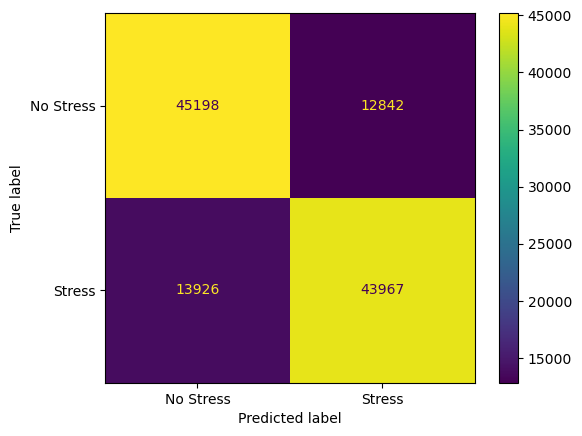

In [8]:
ConfusionMatrixDisplay.from_estimator(lr_1, Xg_val, yg_val, display_labels=['No Stress', 'Stress'])

**Analysis:** \
Correctly Classified: 89,165 points\
Misclassified: 26,768 points\
Total Points: 115,933

76.91% of points correctly classified

### 2.2) Normalized Data that includes GSR

In [9]:
# Initialize the model
lr_2 = LogisticRegression(C=1, solver='liblinear')

# Fit the model to the training set
lr_2.fit(Xg_tr_norm, yg_tr_norm)

# Compute the training and test errors
yg_tr_pred_norm = lr_2.predict(Xg_tr_norm)
train_accuracy = accuracy_score(yg_tr_norm, yg_tr_pred_norm)
train_error = 1 - train_accuracy


yg_val_pred_norm = lr_2.predict(Xg_val_norm)
val_accuracy = accuracy_score(yg_val_norm, yg_val_pred_norm)
val_error = 1 - val_accuracy


print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.23096032380981135
Validation Error:  0.22986552577781993 

Training Accuracy:  0.7690396761901886
Validation Accuracy:  0.7701344742221801


#### a) Cross Validation

In [10]:
# Cross Validation
scores = cross_val_score(lr_2, Xg_tr_norm, yg_tr_norm, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.00


#### b) Confidence Score

In [11]:
# Confidence Score
conf = lr_2.predict_proba(Xg_val_norm)
print(conf)
print(["No Stress", "Stress"])

[[0.92830191 0.07169809]
 [0.03527144 0.96472856]
 [0.69740048 0.30259952]
 ...
 [0.46483698 0.53516302]
 [0.59111496 0.40888504]
 [0.59576772 0.40423228]]
['No Stress', 'Stress']


#### c) Confusion Matrix

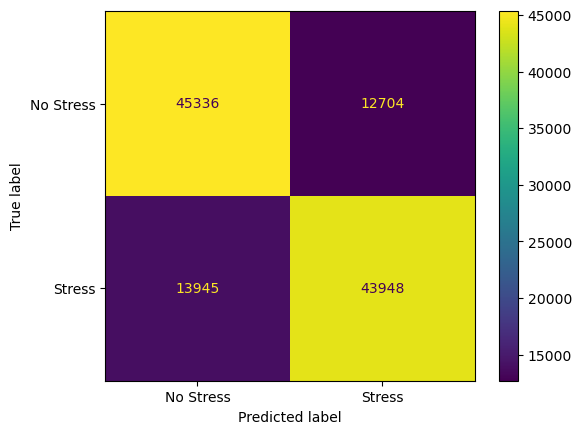

In [12]:
ConfusionMatrixDisplay.from_estimator(lr_2, Xg_val_norm, yg_val_norm, display_labels=['No Stress', 'Stress'])

### 2.3) Data that excludes GSR

In [13]:
# Initialize the model
lr_3 = LogisticRegression(C=1, solver='liblinear')

# Fit the model to the training set
lr_3.fit(X_tr, y_tr)

# Compute the training and test errors
y_tr_pred = lr_3.predict(X_tr)
train_accuracy = accuracy_score(y_tr, y_tr_pred)
train_error = 1 - train_accuracy


y_val_pred = lr_3.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_error = 1 - val_accuracy


print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.40491537083080853
Validation Error:  0.4055359561125823 

Training Accuracy:  0.5950846291691915
Validation Accuracy:  0.5944640438874177


#### a) Cross Validation

In [14]:
# Cross Validation
scores = cross_val_score(lr_3, X_tr, y_tr, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.60 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [15]:
# Confidence Score
conf = lr_3.predict_proba(X_val)
print(conf)
print(["No Stress", "Stress"])

[[0.4720691  0.5279309 ]
 [0.51255971 0.48744029]
 [0.35737393 0.64262607]
 ...
 [0.57448744 0.42551256]
 [0.59484791 0.40515209]
 [0.45087159 0.54912841]]
['No Stress', 'Stress']


#### c) Confusion Matrix

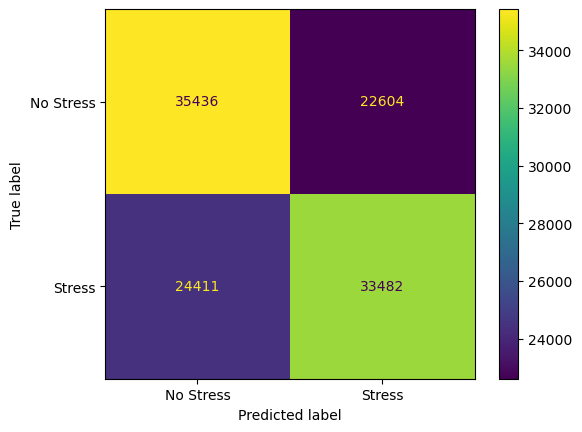

In [16]:
ConfusionMatrixDisplay.from_estimator(lr_3, X_val, y_val, display_labels=['No Stress', 'Stress'])

### 2.4) Normalized Data that excludes GSR

In [17]:
# Initialize the model
lr_4 = LogisticRegression(C=10, solver='saga', penalty='elasticnet', l1_ratio=0.005)

# Fit the model to the training set
lr_4.fit(X_tr_norm, y_tr_norm)

# Compute the training and test errors
y_tr_pred_norm = lr_4.predict(X_tr_norm)
train_accuracy = accuracy_score(y_tr_norm, y_tr_pred_norm)
train_error = 1 - train_accuracy


y_val_pred_norm = lr_4.predict(X_val_norm)
val_accuracy = accuracy_score(y_val_norm, y_val_pred_norm)
val_error = 1 - val_accuracy


print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.4042145304693042
Validation Error:  0.4049321590918893 

Training Accuracy:  0.5957854695306958
Validation Accuracy:  0.5950678409081107


#### a) Cross Validation

In [18]:
# Cross Validation
scores = cross_val_score(lr_4, X_tr_norm, y_tr_norm, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.60 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [19]:
# Confidence Score
conf = lr_4.predict_proba(X_val_norm)
print(conf)
print(["No Stress", "Stress"])

[[0.6214145  0.3785855 ]
 [0.60341509 0.39658491]
 [0.39630273 0.60369727]
 ...
 [0.37201411 0.62798589]
 [0.44064799 0.55935201]
 [0.51504851 0.48495149]]
['No Stress', 'Stress']


#### c) Confusion Matrix

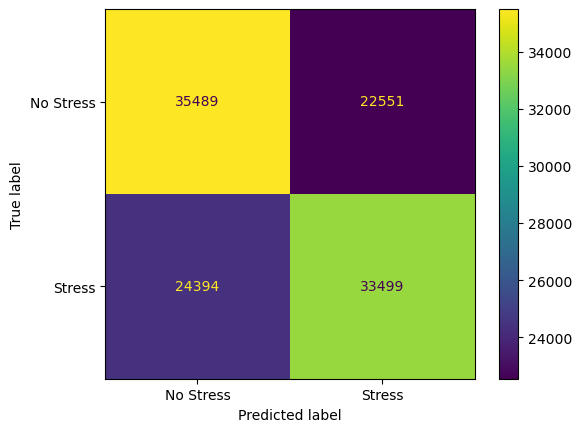

In [20]:
ConfusionMatrixDisplay.from_estimator(lr_4, X_val_norm, y_val_norm, display_labels=['No Stress', 'Stress'])

## 3) Naive Bayes

### 3.1) Data that includes GSR

In [21]:
# Initialize the model
nb_1 = GaussianNB()

# Fit the model to the training set
nb_1.fit(Xg_tr, yg_tr)

# Compute the training and test errors
yg_tr_pred = nb_1.predict(Xg_tr)
train_accuracy = accuracy_score(yg_tr, yg_tr_pred)
train_error = 1 - train_accuracy

yg_val_pred = nb_1.predict(Xg_val)
val_accuracy = accuracy_score(yg_val, yg_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.23108108399517824
Validation Error:  0.2314785263902427 

Training Accuracy:  0.7689189160048218
Validation Accuracy:  0.7685214736097573


### 3.2) Normalized Data that includes GSR

In [22]:
# Initialize the model
nb_2 = GaussianNB()

# Fit the model to the training set
nb_2.fit(Xg_tr_norm, yg_tr_norm)

# Compute the training and test errors
yg_tr_pred = nb_2.predict(Xg_tr_norm)
train_accuracy = accuracy_score(yg_tr_norm, yg_tr_pred_norm)
train_error = 1 - train_accuracy

yg_val_pred = nb_2.predict(Xg_val_norm)
val_accuracy = accuracy_score(yg_val_norm, yg_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.23096032380981135
Validation Error:  0.2303658147378227 

Training Accuracy:  0.7690396761901886
Validation Accuracy:  0.7696341852621773


### 3.3) Data that excludes GSR

In [23]:
# Initialize the model
nb_3 = GaussianNB()

# Fit the model to the training set
nb_3.fit(X_tr, y_tr)

# Compute the training and test errors
y_tr_pred = nb_3.predict(X_tr)
train_accuracy = accuracy_score(y_tr, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = nb_3.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.3776559154161159
Validation Error:  0.37750252300897935 

Training Accuracy:  0.6223440845838841
Validation Accuracy:  0.6224974769910206


### 3.4) Normalized Data that excludes GSR

In [24]:
# Initialize the model
nb_4 = GaussianNB()

# Fit the model to the training set
nb_4.fit(X_tr_norm, y_tr_norm)

# Compute the training and test errors
y_tr_pred = nb_4.predict(X_tr_norm)
train_accuracy = accuracy_score(y_tr_norm, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = nb_4.predict(X_val_norm)
val_accuracy = accuracy_score(y_val_norm, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.37837616366455407
Validation Error:  0.3783392131662253 

Training Accuracy:  0.6216238363354459
Validation Accuracy:  0.6216607868337747


## 4) Decision Tree

### 4.1) Data that includes GSR

In [253]:
# Initialize the model
dt_1 = DecisionTreeClassifier(criterion='entropy', max_depth=60, min_samples_split=200, min_samples_leaf=2)

# Fit the model to the training set
dt_1.fit(Xg_tr, yg_tr)

# Compute the training and test errors
y_tr_pred = dt_1.predict(Xg_tr)
train_accuracy = accuracy_score(yg_tr, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = dt_1.predict(Xg_val)
val_accuracy = accuracy_score(yg_val, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.14752366144882034
Validation Error:  0.16197286363675567 

Training Accuracy:  0.8524763385511797
Validation Accuracy:  0.8380271363632443


#### a) Cross Validation

In [254]:
# Cross Validation
scores = cross_val_score(dt_1, Xg_tr, yg_tr, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [255]:
# Confidence Score
conf = dt_1.predict_proba(Xg_val)
print(conf)
print(["No Stress", "Stress"])

[[0.76041667 0.23958333]
 [0.         1.        ]
 [1.         0.        ]
 ...
 [0.18518519 0.81481481]
 [0.         1.        ]
 [0.56493506 0.43506494]]
['No Stress', 'Stress']


#### c) Confusion Matrix

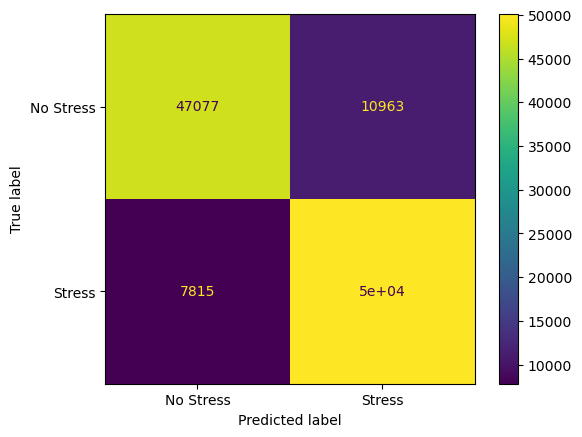

In [256]:
ConfusionMatrixDisplay.from_estimator(dt_1, Xg_val, yg_val, display_labels=['No Stress', 'Stress'])

### 4.2) Normalized Data that includes GSR

In [117]:
# Initialize the model
dt_2 = DecisionTreeClassifier(criterion='entropy', max_depth=60, min_samples_split=200, min_samples_leaf=2)

# Fit the model to the training set
dt_2.fit(Xg_tr_norm, yg_tr_norm)

# Compute the training and test errors
y_tr_pred = dt_2.predict(Xg_tr_norm)
train_accuracy = accuracy_score(yg_tr_norm, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = dt_2.predict(Xg_val_norm)
val_accuracy = accuracy_score(yg_val_norm, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.14703630784358968
Validation Error:  0.16381875738573137 

Training Accuracy:  0.8529636921564103
Validation Accuracy:  0.8361812426142686


#### a) Cross Validation

In [118]:
# Cross Validation
scores = cross_val_score(dt_2, Xg_tr_norm, yg_tr_norm, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [119]:
# Confidence Score
conf = dt_2.predict_proba(Xg_val_norm)
print(conf)
print(["No Stress", "Stress"])

[[1.         0.        ]
 [0.         1.        ]
 [0.85714286 0.14285714]
 ...
 [0.65445026 0.34554974]
 [0.78640777 0.21359223]
 [0.15328467 0.84671533]]
['No Stress', 'Stress']


#### c) Confusion Matrix

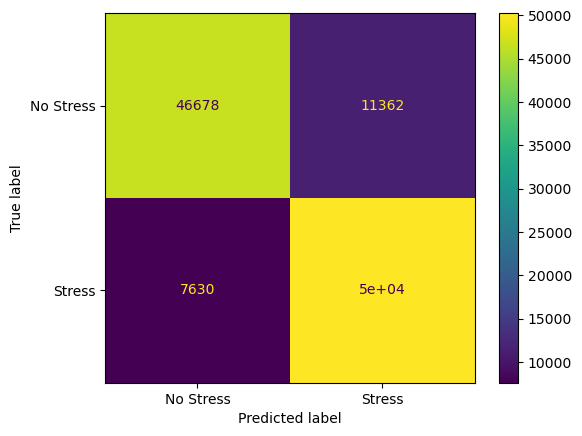

In [120]:
ConfusionMatrixDisplay.from_estimator(dt_2, Xg_val_norm, yg_val_norm, display_labels=['No Stress', 'Stress'])

### 4.3) Data that excludes GSR

In [271]:
# Initialize the model
dt_3 = DecisionTreeClassifier(criterion='entropy', max_depth=45, min_samples_split=50, min_samples_leaf=50, min_impurity_decrease=0, ccp_alpha=0, max_leaf_nodes=150)
rf_3 = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=45, min_samples_split=50, min_samples_leaf=50, max_leaf_nodes=150)

# Fit the model to the training set
dt_3.fit(X_tr, y_tr)
rf_3.fit(X_tr, y_tr)

# Compute the training and test errors
y_tr_pred = dt_3.predict(X_tr)
train_accuracy = accuracy_score(y_tr, y_tr_pred)
train_error = 1 - train_accuracy



y_val_pred = dt_3.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_error = 1 - val_accuracy



print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)
print()

y_tr_rf_pred = rf_3.predict(X_tr)
train_accuracy = rf_3.score(X_tr, y_tr_pred)
train_error = 1 - train_accuracy

y_val_rf_pred = rf_3.predict(X_val)
val_accuracy = rf_3.score(X_val, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)


Training Error:  0.28320635543604133
Validation Error:  0.28397436450363567 

Training Accuracy:  0.7167936445639587
Validation Accuracy:  0.7160256354963643

Training Error:  0.06999346601139889
Validation Error:  0.07078226216866634 

Training Accuracy:  0.9300065339886011
Validation Accuracy:  0.9292177378313337


#### a) Cross Validation

In [272]:
# Cross Validation
scores = cross_val_score(dt_3, X_tr, y_tr, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.00
0.72 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [268]:
# Confidence Score
conf = dt_3.predict_proba(X_val)
print(conf[:50])
print(["No Stress", "Stress"])

[[0.7289808  0.2710192 ]
 [0.         1.        ]
 [0.63403081 0.36596919]
 [0.         1.        ]
 [0.61771823 0.38228177]
 [0.18109809 0.81890191]
 [0.73550918 0.26449082]
 [0.28657352 0.71342648]
 [0.46402452 0.53597548]
 [0.52694641 0.47305359]
 [0.58867295 0.41132705]
 [0.38019264 0.61980736]
 [0.61771823 0.38228177]
 [0.         1.        ]
 [0.70147984 0.29852016]
 [0.48691534 0.51308466]
 [0.15023152 0.84976848]
 [1.         0.        ]
 [0.05020894 0.94979106]
 [0.72143688 0.27856312]
 [0.82942339 0.17057661]
 [0.49381779 0.50618221]
 [0.54002337 0.45997663]
 [0.28657352 0.71342648]
 [0.32163297 0.67836703]
 [0.90536398 0.09463602]
 [0.84350861 0.15649139]
 [0.         1.        ]
 [0.8211351  0.1788649 ]
 [0.46781618 0.53218382]
 [0.61907215 0.38092785]
 [0.7152511  0.2847489 ]
 [0.6292728  0.3707272 ]
 [0.70296334 0.29703666]
 [0.45258373 0.54741627]
 [0.70148395 0.29851605]
 [0.41158825 0.58841175]
 [0.77844784 0.22155216]
 [0.61958069 0.38041931]
 [0.90051946 0.09948054]


#### c) Confusion Matrix 

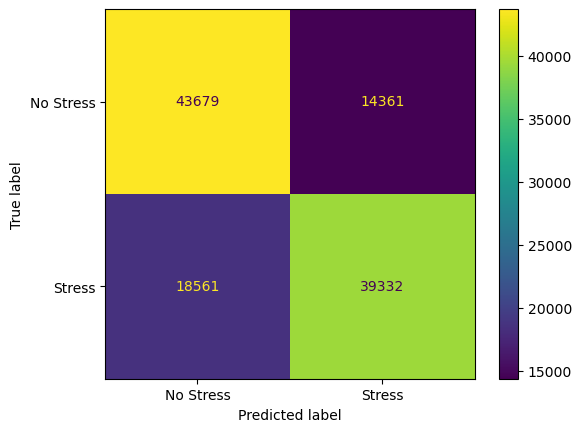

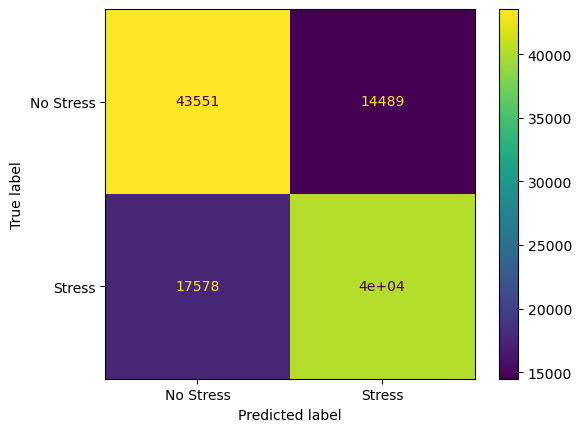

In [263]:
ConfusionMatrixDisplay.from_estimator(dt_3, X_val, y_val, display_labels=['No Stress', 'Stress'])

### 4.4) Normalized Data that excludes GSR

In [213]:
# Initialize the model
dt_4 = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=70, min_samples_leaf=100, min_impurity_decrease=0, ccp_alpha=0, max_leaf_nodes=100)

# Fit the model to the training set
dt_4.fit(X_tr_norm, y_tr_norm)

# Compute the training and test errors
y_tr_pred = dt_4.predict(X_tr_norm)
train_accuracy = accuracy_score(y_tr_norm, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = dt_4.predict(X_val_norm)
val_accuracy = accuracy_score(y_val_norm, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.28607225340662323
Validation Error:  0.2872262427436537 

Training Accuracy:  0.7139277465933768
Validation Accuracy:  0.7127737572563463


#### a) Cross Validation

In [214]:
# Cross Validation
scores = cross_val_score(dt_4, X_tr_norm, y_tr_norm, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [273]:
# Confidence Score
conf = dt_4.predict_proba(X_val_norm)
print(conf)
print(["No Stress", "Stress"])

[[0.60963287 0.39036713]
 [0.63989658 0.36010342]
 [0.61909699 0.38090301]
 ...
 [0.71723077 0.28276923]
 [0.61909699 0.38090301]
 [0.28571429 0.71428571]]
['No Stress', 'Stress']


#### c) Confusion Matrix

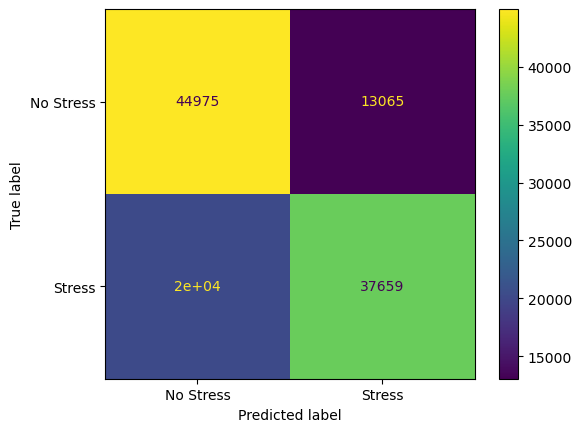

In [217]:
ConfusionMatrixDisplay.from_estimator(dt_4, X_val_norm, y_val_norm, display_labels=['No Stress', 'Stress'])

## 5) Neural Network

### 5.1) Data that includes GSR

In [51]:
X_tr_subset, y_tr_subset = Xg_tr[:2000], yg_tr[:2000]
X_val_subset, y_val_subset = Xg_val[:2000], yg_val[:2000]

# Initialize the model
mlp_1 = MLPClassifier(hidden_layer_sizes=(300,100,5,400), activation='tanh', solver='adam', alpha=0.05, batch_size=600, learning_rate='constant', learning_rate_init=0.0002, max_iter=300)

# Fit the model to the training set
mlp_1.fit(X_tr_subset, y_tr_subset)

# Compute the training and test errors
y_tr_pred = mlp_1.predict(X_tr_subset)
train_accuracy = accuracy_score(y_tr_subset, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = mlp_1.predict(X_val_subset)
val_accuracy = accuracy_score(y_val_subset, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Testing Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.19799999999999995
Testing Error:  0.20950000000000002 

Training Accuracy:  0.802
Validation Accuracy:  0.7905


#### a) Cross Validation

In [48]:
# Cross Validation
scores = cross_val_score(mlp_1, X_tr_subset, y_tr_subset, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\citla\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.81 accuracy with a standard deviation of 0.01


#### b) Confidence Scores

In [52]:
# Confidence Score
conf = mlp_1.predict_proba(X_val_subset)
print(conf)
print(["No Stress", "Stress"])

[[0.92061201 0.07938799]
 [0.95496094 0.04503906]
 [0.98893854 0.01106146]
 ...
 [0.122834   0.877166  ]
 [0.98963752 0.01036248]
 [0.20588366 0.79411634]]
['No Stress', 'Stress']


#### c) Confusion Matrix

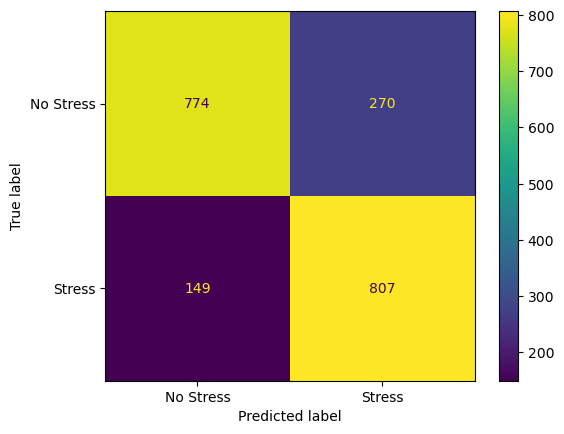

In [53]:
ConfusionMatrixDisplay.from_estimator(mlp_1, X_val_subset, y_val_subset, display_labels=['No Stress', 'Stress'])

### 5.2) Normalized Data that includes GSR

In [57]:
X_tr_subset, y_tr_subset = Xg_tr_norm[:2000], yg_tr_norm[:2000]
X_val_subset, y_val_subset = Xg_val_norm[:2000], yg_val_norm[:2000]

# Initialize the model
mlp_2 = MLPClassifier(hidden_layer_sizes=(300,100,5,400), activation='tanh', solver='adam', alpha=0.05, batch_size=600, learning_rate='constant', learning_rate_init=0.0002, max_iter=300)

# Fit the model to the training set
mlp_2.fit(X_tr_subset, y_tr_subset)

# Compute the training and test errors
y_tr_pred = mlp_2.predict(X_tr_subset)
train_accuracy = accuracy_score(y_tr_subset, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = mlp_2.predict(X_val_subset)
val_accuracy = accuracy_score(y_val_subset, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Testing Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.18899999999999995
Testing Error:  0.2015 

Training Accuracy:  0.811
Validation Accuracy:  0.7985


#### a) Cross Validation

In [54]:
# Cross Validation
scores = cross_val_score(mlp_2, X_tr_subset, y_tr_subset, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.80 accuracy with a standard deviation of 0.02


#### b) Confidence Scores

In [55]:
# Confidence Score
conf = mlp_2.predict_proba(X_val_subset)
print(conf)
print(["No Stress", "Stress"])

[[4.03688751e-04 9.99596311e-01]
 [4.01856444e-04 9.99598144e-01]
 [4.15934130e-04 9.99584066e-01]
 ...
 [4.08018499e-04 9.99591982e-01]
 [4.04877868e-04 9.99595122e-01]
 [4.02321132e-04 9.99597679e-01]]
['No Stress', 'Stress']


#### c) Confusion Matrix

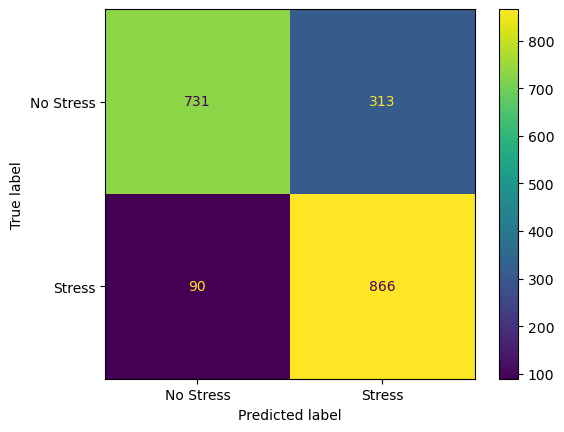

In [58]:
ConfusionMatrixDisplay.from_estimator(mlp_2, X_val_subset, y_val_subset, display_labels=['No Stress', 'Stress'])

### 5.3) Data that excludes GSR

In [59]:
X_tr_subset, y_tr_subset = X_tr[:2000], y_tr[:2000]
X_val_subset, y_val_subset = X_val[:2000], y_val[:2000]

# Initialize the model
mlp_3 = MLPClassifier(hidden_layer_sizes=(300,100,5,400), activation='tanh', solver='adam', alpha=0.05, batch_size=600, learning_rate='constant', learning_rate_init=0.0002, max_iter=300)

# Fit the model to the training set
mlp_3.fit(X_tr_subset, y_tr_subset)

# Compute the training and test errors
y_tr_pred = mlp_3.predict(X_tr_subset)
train_accuracy = accuracy_score(y_tr_subset, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = mlp_3.predict(X_val_subset)
val_accuracy = accuracy_score(y_val_subset, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Testing Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.38
Testing Error:  0.41400000000000003 

Training Accuracy:  0.62
Validation Accuracy:  0.586


#### a) Cross Validation

In [60]:
# Cross Validation
scores = cross_val_score(mlp_3, X_tr_subset, y_tr_subset, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\citla\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\citla\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.61 accuracy with a standard deviation of 0.02


#### b) Confidence Scores

In [61]:
# Confidence Score
conf = mlp_3.predict_proba(X_val_subset)
print(conf)
print(["No Stress", "Stress"])

[[0.4900304  0.5099696 ]
 [0.66385471 0.33614529]
 [0.36315111 0.63684889]
 ...
 [0.31829662 0.68170338]
 [0.61775711 0.38224289]
 [0.39915439 0.60084561]]
['No Stress', 'Stress']


#### c) Confusion Matrix

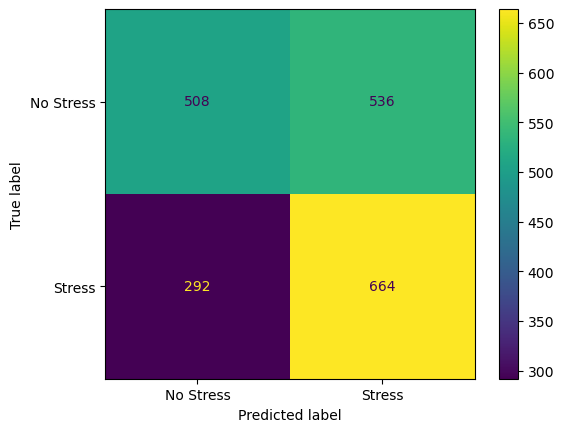

In [62]:
ConfusionMatrixDisplay.from_estimator(mlp_3, X_val_subset, y_val_subset, display_labels=['No Stress', 'Stress'])

### 5.4) Normalized Data that excludes GSR

In [63]:
X_tr_subset, y_tr_subset = X_tr_norm[:2000], y_tr_norm[:2000]
X_val_subset, y_val_subset = X_val_norm[:2000], y_val_norm[:2000]

# Initialize the model
mlp_4 = MLPClassifier(hidden_layer_sizes=(300,100,5,400), activation='tanh', solver='adam', alpha=0.05, batch_size=600, learning_rate='constant', learning_rate_init=0.0002, max_iter=300)

# Fit the model to the training set
mlp_4.fit(X_tr_subset, y_tr_subset)

# Compute the training and test errors
y_tr_pred = mlp_4.predict(X_tr_subset)
train_accuracy = accuracy_score(y_tr_subset, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = mlp_4.predict(X_val_subset)
val_accuracy = accuracy_score(y_val_subset, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Testing Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.38
Testing Error:  0.4065 

Training Accuracy:  0.62
Validation Accuracy:  0.5935


#### a) Cross Validation 

In [64]:
# Cross Validation
scores = cross_val_score(mlp_4, X_tr_subset, y_tr_subset, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\citla\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.63 accuracy with a standard deviation of 0.03


C:\Users\citla\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


#### b) Confidence Scores

In [65]:
# Confidence Score
conf = mlp_4.predict_proba(X_val_subset)
print(conf)
print(["No Stress", "Stress"])

[[0.60507944 0.39492056]
 [0.58692893 0.41307107]
 [0.36834633 0.63165367]
 ...
 [0.61243406 0.38756594]
 [0.44165475 0.55834525]
 [0.50995827 0.49004173]]
['No Stress', 'Stress']


#### c) Confusion Matrix

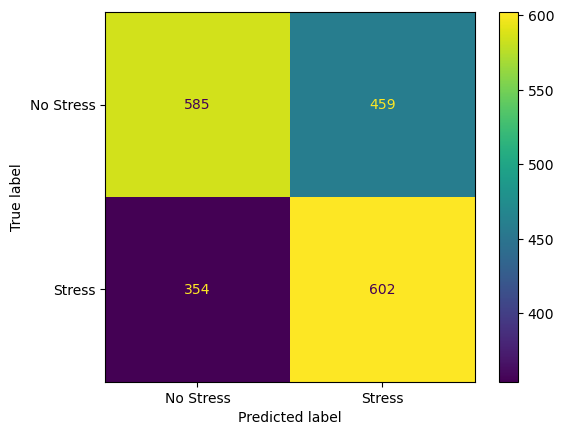

In [66]:
ConfusionMatrixDisplay.from_estimator(mlp_4, X_val_subset, y_val_subset, display_labels=['No Stress', 'Stress'])

## 6) Random Forest

### 6.1) Data that includes GSR

In [4]:
# Initialize the model
# rf_1 = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=50, min_samples_split=60, min_samples_leaf=300, max_leaf_nodes=80)
rf_1 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=1000, min_samples_split=200, min_samples_leaf=10, max_leaf_nodes=51000)

# Fit the model to the training set
rf_1.fit(Xg_tr, yg_tr)

# Compute the training and test errors
y_tr_pred = rf_1.predict(Xg_tr)
train_accuracy = accuracy_score(yg_tr, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = rf_1.predict(Xg_val)
val_accuracy = accuracy_score(yg_val, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.14706649788993142
Validation Error:  0.15258813280084182 

Training Accuracy:  0.8529335021100686
Validation Accuracy:  0.8474118671991582


#### a) Cross Validation

In [292]:
# Cross Validation
scores = cross_val_score(rf_1, Xg_tr, yg_tr, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.83 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [295]:
conf = rf_1.predict_proba(Xg_val)
print(conf)
print(["No Stress", "Stress"])

[[0.83862675 0.16137325]
 [0.13608904 0.86391096]
 [0.9938119  0.0061881 ]
 ...
 [0.14232239 0.85767761]
 [0.05056619 0.94943381]
 [0.37073908 0.62926092]]
['No Stress', 'Stress']


#### c) Confusion Matrix

F1 Score:  0.8531438343655049


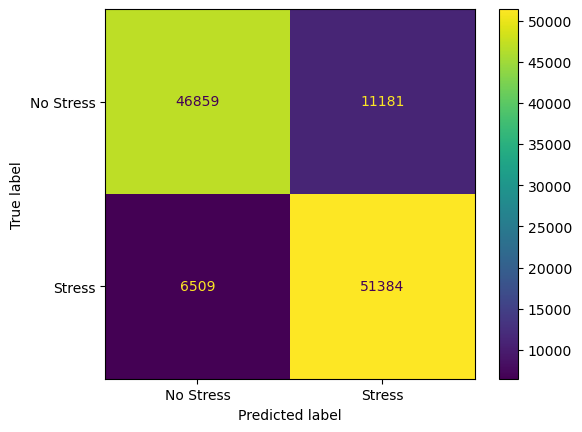

In [9]:
ConfusionMatrixDisplay.from_estimator(rf_1, Xg_val, yg_val, display_labels=['No Stress', 'Stress'])
print("F1 Score: ", f1_score(yg_val, y_val_pred))

Elapsed time to compute the importances: 78.134 seconds


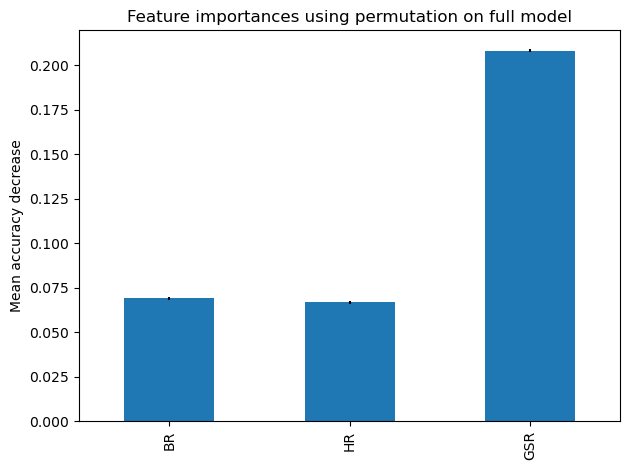

In [15]:
# Get Importance

import time
# Testing this method out (still uses permutation importance)
feature_names = ['BR', 'HR', 'GSR']
start_time = time.time()
result = permutation_importance(
    rf_1, Xg_val, yg_val, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

# Display
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### 6.2) Normalized Data that includes GSR

In [297]:
# Initialize the model
rf_2 = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=50, min_samples_split=60, min_samples_leaf=300, max_leaf_nodes=80)

# Fit the model to the training set
rf_2.fit(Xg_tr_norm, yg_tr_norm)

# Compute the training and test errors
y_tr_pred = rf_2.predict(Xg_tr_norm)
train_accuracy = accuracy_score(yg_tr_norm, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = rf_2.predict(Xg_val_norm)
val_accuracy = accuracy_score(yg_val_norm, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.16552124193224926
Validation Error:  0.16663935203954006 

Training Accuracy:  0.8344787580677507
Validation Accuracy:  0.8333606479604599


#### a) Cross Validation

In [299]:
# Cross Validation
scores = cross_val_score(rf_2, Xg_tr_norm, yg_tr_norm, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.83 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [300]:
conf = rf_2.predict_proba(Xg_val_norm)
print(conf)
print(["No Stress", "Stress"])

[[0.99326848 0.00673152]
 [0.13338842 0.86661158]
 [0.89162404 0.10837596]
 ...
 [0.51888965 0.48111035]
 [0.63069491 0.36930509]
 [0.31683204 0.68316796]]
['No Stress', 'Stress']


#### c) Confusion Matrix

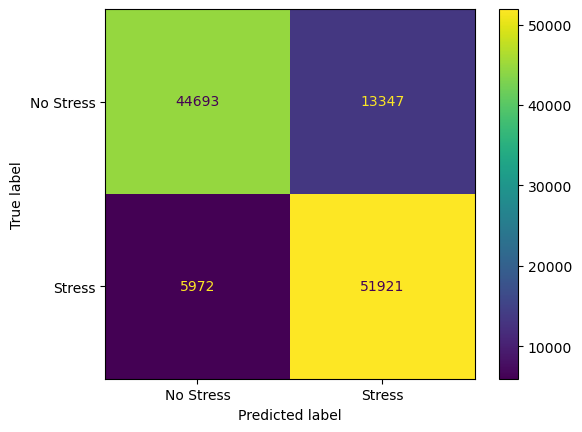

In [301]:
ConfusionMatrixDisplay.from_estimator(rf_2, Xg_val_norm, yg_val_norm, display_labels=['No Stress', 'Stress'])

### 6.3) Data without GSR

In [342]:
# Initialize the model
rf_3 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=1000, min_samples_split=200, min_samples_leaf=10, max_leaf_nodes=51000)
# rf_3 = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=45, min_samples_split=50, min_samples_leaf=50, max_leaf_nodes=150)


# Fit the model to the training set
rf_3.fit(X_tr, y_tr)

# Compute the training and test errors
y_tr_pred = rf_3.predict(X_tr)
train_accuracy = accuracy_score(y_tr, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = rf_3.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.25872007142102393
Validation Error:  0.2670076682221628 

Training Accuracy:  0.7412799285789761
Validation Accuracy:  0.7329923317778372


#### a) Cross Validation

In [325]:
# Cross Validation
scores = cross_val_score(rf_3, X_tr, y_tr, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [326]:
conf = rf_3.predict_proba(X_val)
print(conf)
print(["No Stress", "Stress"])

[[0.78407481 0.21592519]
 [0.         1.        ]
 [0.61435691 0.38564309]
 ...
 [0.19237597 0.80762403]
 [0.01480099 0.98519901]
 [0.68839059 0.31160941]]
['No Stress', 'Stress']


#### c) Confusion Matrix

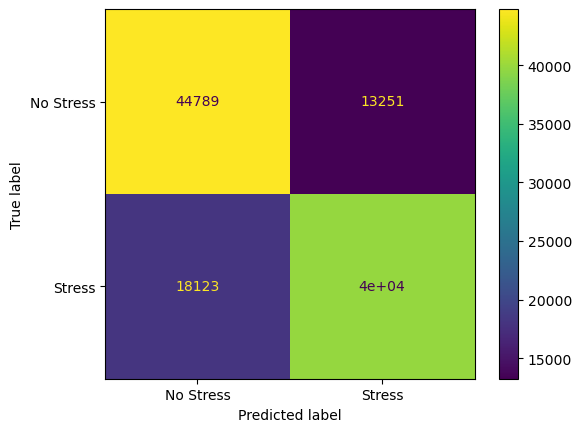

In [327]:
ConfusionMatrixDisplay.from_estimator(rf_3, X_val, y_val, display_labels=['No Stress', 'Stress'])

### 6.4) Normalized data excluding GSR

In [334]:
# Initialize the model
rf_4 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=50, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=200)

# Fit the model to the training set
rf_4.fit(X_tr_norm, y_tr_norm)

# Compute the training and test errors
y_tr_pred = rf_4.predict(X_tr_norm)
train_accuracy = accuracy_score(y_tr_norm, y_tr_pred)
train_error = 1 - train_accuracy

y_val_pred = rf_4.predict(X_val_norm)
val_accuracy = accuracy_score(y_val_norm, y_val_pred)
val_error = 1 - val_accuracy

print("Training Error: ", train_error)
print("Validation Error: ", val_error, "\n")

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Error:  0.2745374992722043
Validation Error:  0.2762802653256622 

Training Accuracy:  0.7254625007277957
Validation Accuracy:  0.7237197346743378


#### a) Cross Validation

In [329]:
# Cross Validation
scores = cross_val_score(rf_4, X_tr_norm, y_tr_norm, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.00


#### b) Confidence Scores

In [332]:
conf = rf_4.predict_proba(X_val_norm)
print(conf)
print(["No Stress", "Stress"])

[[0.62884964 0.37115036]
 [0.63474647 0.36525353]
 [0.6190408  0.3809592 ]
 ...
 [0.65031662 0.34968338]
 [0.70231691 0.29768309]
 [0.27736232 0.72263768]]
['No Stress', 'Stress']


#### c) Confusion Matrix

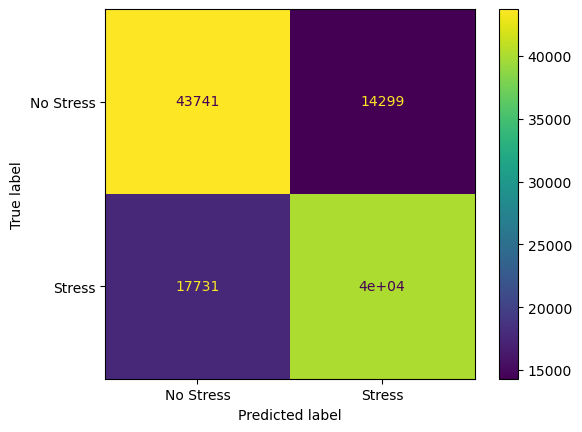

In [335]:
ConfusionMatrixDisplay.from_estimator(rf_4, X_val_norm, y_val_norm, display_labels=['No Stress', 'Stress'])